In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(path):
    df = pd.read_csv(path)
    return df

df = load_data("titanic_disaster.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


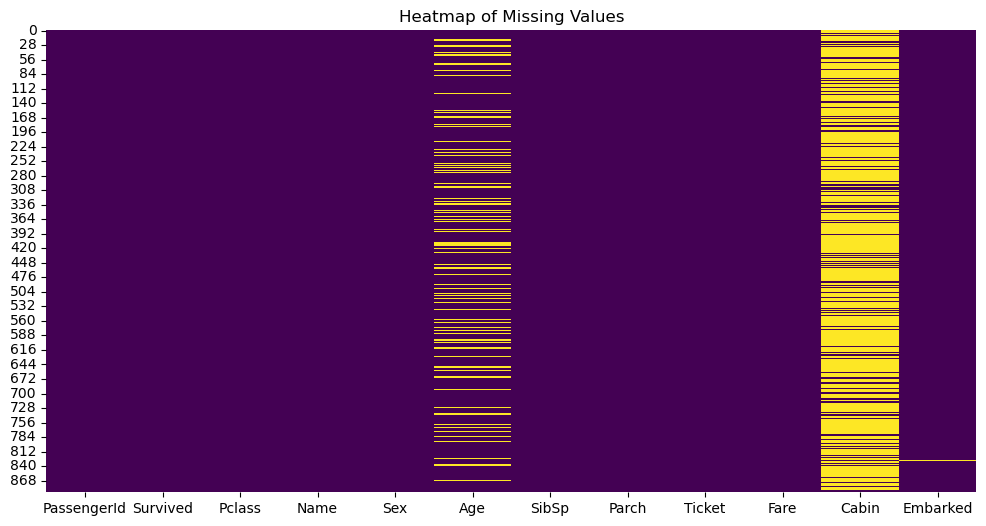

In [6]:
#Câu 2
df.isnull().sum()
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()
#Nhận xét:
#Age: Có khá nhiều giá trị bị thiếu. Đây là biến số quan trọng nên cần được xử lý
#Cabin: Là biến có số lượng dữ liệu thiếu rất lớn. Do thiếu quá nhiều thông tin,
#cột này có thể được loại bỏ hoặc chuyển thành biến nhị phân




In [7]:
#Câu 3
df[['secondName', 'firstName']] = df['Name'].str.split(',', expand=True)

df['firstName'] = df['firstName'].str.strip()
df['secondName'] = df['secondName'].str.strip()

df.drop(columns=['Name'], inplace=True)

df[['firstName', 'secondName']].head()


,firstName,secondName
0,Mr. Owen Harris,Braund
1,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,Miss. Laina,Heikkinen
3,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,Mr. William Henry,Allen


In [9]:
#Câu 4
df['Sex'] = df['Sex'].replace({
    'male': 'M',
    'female': 'F'
})

df['Sex'].value_counts()


Sex
M    577
F    314
Name: count, dtype: int64

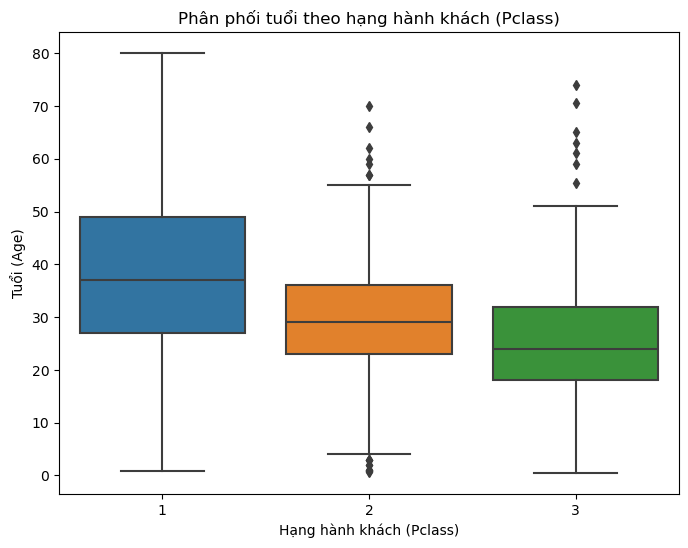

In [11]:
#Câu 5
#a
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Phân phối tuổi theo hạng hành khách (Pclass)")
plt.xlabel("Hạng hành khách (Pclass)")
plt.ylabel("Tuổi (Age)")
plt.show()


,Pclass,Age
0,3,22.00000
1,1,38.00000
2,3,26.00000
3,1,35.00000
4,3,35.00000
5,3,25.14062
6,1,54.00000
7,3,2.00000
8,3,27.00000
9,2,14.00000


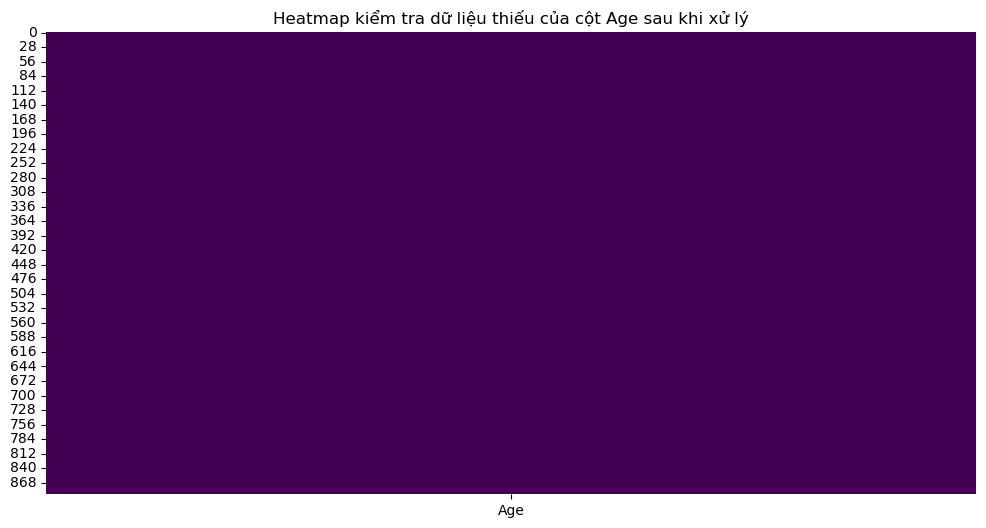

In [18]:
#Câu 5
#b
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.mean())
)

display(df[['Pclass', 'Age']].head(10))

plt.figure(figsize=(12,6))
sns.heatmap(df[['Age']].isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap kiểm tra dữ liệu thiếu của cột Age sau khi xử lý")
plt.show()


In [23]:
#Câu 6
df['Agegroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 60, float('inf')],
    labels=['Kid', 'Teen', 'Adult', 'Older'],
    right=True
)
df[['Age', 'Agegroup']].head(10)


,Age,Agegroup
0,22.00000,Adult
1,38.00000,Adult
2,26.00000,Adult
3,35.00000,Adult
4,35.00000,Adult
5,25.14062,Adult
6,54.00000,Adult
7,2.00000,Kid
8,27.00000,Adult
9,14.00000,Teen


In [24]:
#Câu 7
df['namePrefix'] = df['secondName'].str.extract(
    r'(Mr|Mrs|Miss|Master)', expand=False
)

df[['secondName', 'namePrefix']].head(10)


,secondName,namePrefix
0,Braund,NaN
1,Cumings,NaN
2,Heikkinen,NaN
3,Futrelle,NaN
4,Allen,NaN
5,Moran,NaN
6,McCarthy,NaN
7,Palsson,NaN
8,Johnson,NaN
9,Nasser,NaN


In [28]:
#Câu 8
df['familySize'] = 1 + df['SibSp'] + df['Parch']

df[['SibSp', 'Parch', 'familySize']].head(10)


,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2
